In [1]:
import pennylane as qml
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load datasets
data = pd.read_csv('dos_data.csv')



# Features to use (excluding 'label')
features = ['frame.len', 'wlan.duration', 'wlan.seq', 'data.len', 'wlan.fc.type',
       'frame.protocols', 'llc.type', 'ip.hdr_len', 'ip.len', 'ip.ttl',
       'ip.proto', 'udp.srcport', 'udp.dstport', 'udp.length', 'temperature',
       'battery','vgx', 'vgy', 'vgz', 'pitch', 'roll', 'yaw','class']




In [2]:
from sklearn.preprocessing import MinMaxScaler
data = data[features]
# Separate features and labels
X = data.drop('class', axis=1)
y = data['class']

# Normalize the features to the range [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


CNN Equivalent


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


2024-09-23 02:28:36.399638: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-23 02:28:36.408788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-23 02:28:36.417878: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-23 02:28:36.420729: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-23 02:28:36.428300: I tensorflow/core/platform/cpu_feature_guar

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target values
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [18]:
def initialize_model():
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        BatchNormalization(),  # Add batch normalization
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        BatchNormalization(),  # Add batch normalization
        Flatten(),
        Dense(32, activation='relu'),  # Increase L2 regularization
        Dropout(0.6),  # Increase dropout rate further
        Dense(1, activation='sigmoid')  # Use sigmoid for binary classification
    ])

    # Compile the model with a lower learning rate
    model.compile(optimizer=Adam(learning_rate=0.0001),  # Decreased learning rate
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy'])
    return model


In [21]:
model = initialize_model()
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


/home/ap1284@DS.UAH.edu/Atit/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7532 - loss: 0.5725 - val_accuracy: 0.8357 - val_loss: 0.4246
Epoch 2/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8306 - loss: 0.4479 - val_accuracy: 0.8562 - val_loss: 0.3879
Epoch 3/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8432 - loss: 0.4236 - val_accuracy: 0.8663 - val_loss: 0.3746
Epoch 4/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8426 - loss: 0.4134 - val_accuracy: 0.8646 - val_loss: 0.3564
Epoch 5/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8542 - loss: 0.3855 - val_accuracy: 0.8709 - val_loss: 0.3339
Epoch 6/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8609 - loss: 0.3778 - val_accuracy: 0.8812 - val_loss: 0.3265
Epoch 7/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8652 - loss: 0.3635 - val_accuracy: 0.8854 - val_loss: 0.3220
Epoch 8/50
537/537 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8649 - loss: 0.3561 - val_accuracy: 0.8863 - val_

  1/135 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8125 - loss: 0.2584

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.9112 - loss: 0.2069

Test Loss: 0.21004308760166168
Test Accuracy: 0.910764217376709


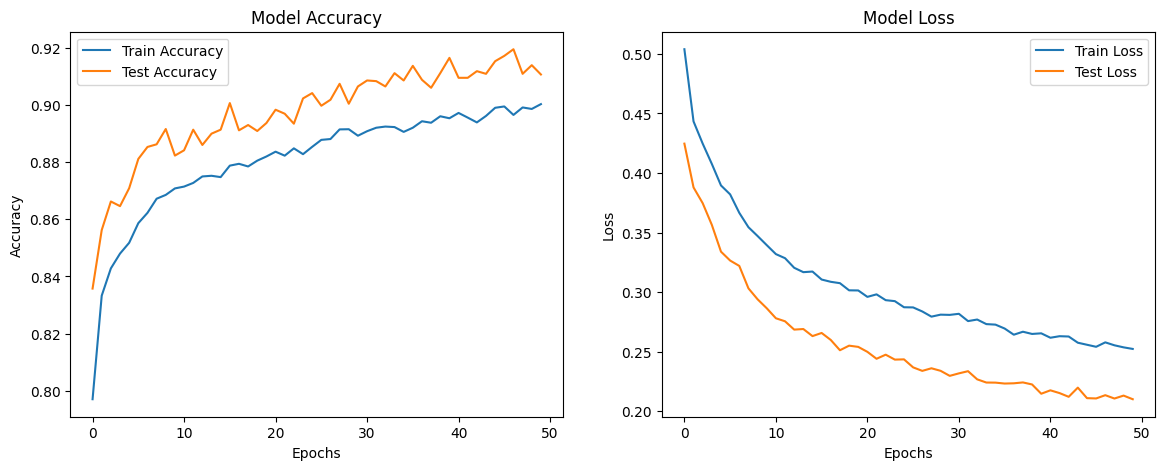

In [22]:
def plot_metrics(model, X_test, y_test, history):
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"\nTest Loss: {loss}\nTest Accuracy: {accuracy}")

    # Plot accuracy and loss
    plt.figure(figsize=(14, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

plot_metrics(model, X_test, y_test, history)

In [3]:

# Combine original and second-order features
X_combined = ((X_normalized))


In [4]:
# Number of qubits needed for 32 features
num_qubits = 5



In [25]:
import pennylane as qml

# Define the quantum device with 5 qubits
dev = qml.device('default.qubit', wires=num_qubits)

# Define the quantum circuit for encoding and variational layers
@qml.qnode(dev)
def circuit(features, weights):
    # Encode the original and second-order features using RY gates
    for i in range(num_qubits):
        qml.RY(features[i] * np.pi, wires=i)  # First 16 features (original)
        qml.RY(features[i + num_qubits] * np.pi, wires=i)  # Next 16 features (second-order)

    # Variational layers with trainable parameters (3 layers)
    for j in range(3):
        for k in range(num_qubits):
            qml.RY(weights[j][k], wires=k)
        # Add entangling layers (CNOT gates)
        for k in range(num_qubits - 1):
            qml.CNOT(wires=[k, k + 1])

    # Return expectation value of the first qubit
    return qml.expval(qml.PauliZ(0))


In [22]:
import pennylane as qml
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load datasets
data = pd.read_csv('dos_data.csv')
data = data.sample(frac=1).reset_index(drop=True)


# Features to use (excluding 'label')
features = ['frame.len', 'wlan.duration', 'wlan.seq', 'data.len', 'wlan.fc.type',
       'frame.protocols', 'llc.type', 'ip.hdr_len', 'ip.len', 'ip.ttl',
       'ip.proto', 'udp.srcport', 'udp.dstport', 'udp.length', 'temperature',
       'battery', 'pitch', 'roll', 'yaw','class']




In [23]:
from sklearn.preprocessing import MinMaxScaler
data = data[features]
# Separate features and labels
X = data.drop('class', axis=1)
y = data['class']

# Normalize the features to the range [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


In [24]:

# Combine original and second-order features
X_combined = ((X_normalized))


In [25]:
# Number of qubits needed for 32 features
num_qubits = 5



Output of the circuit: 0.2633008130765742


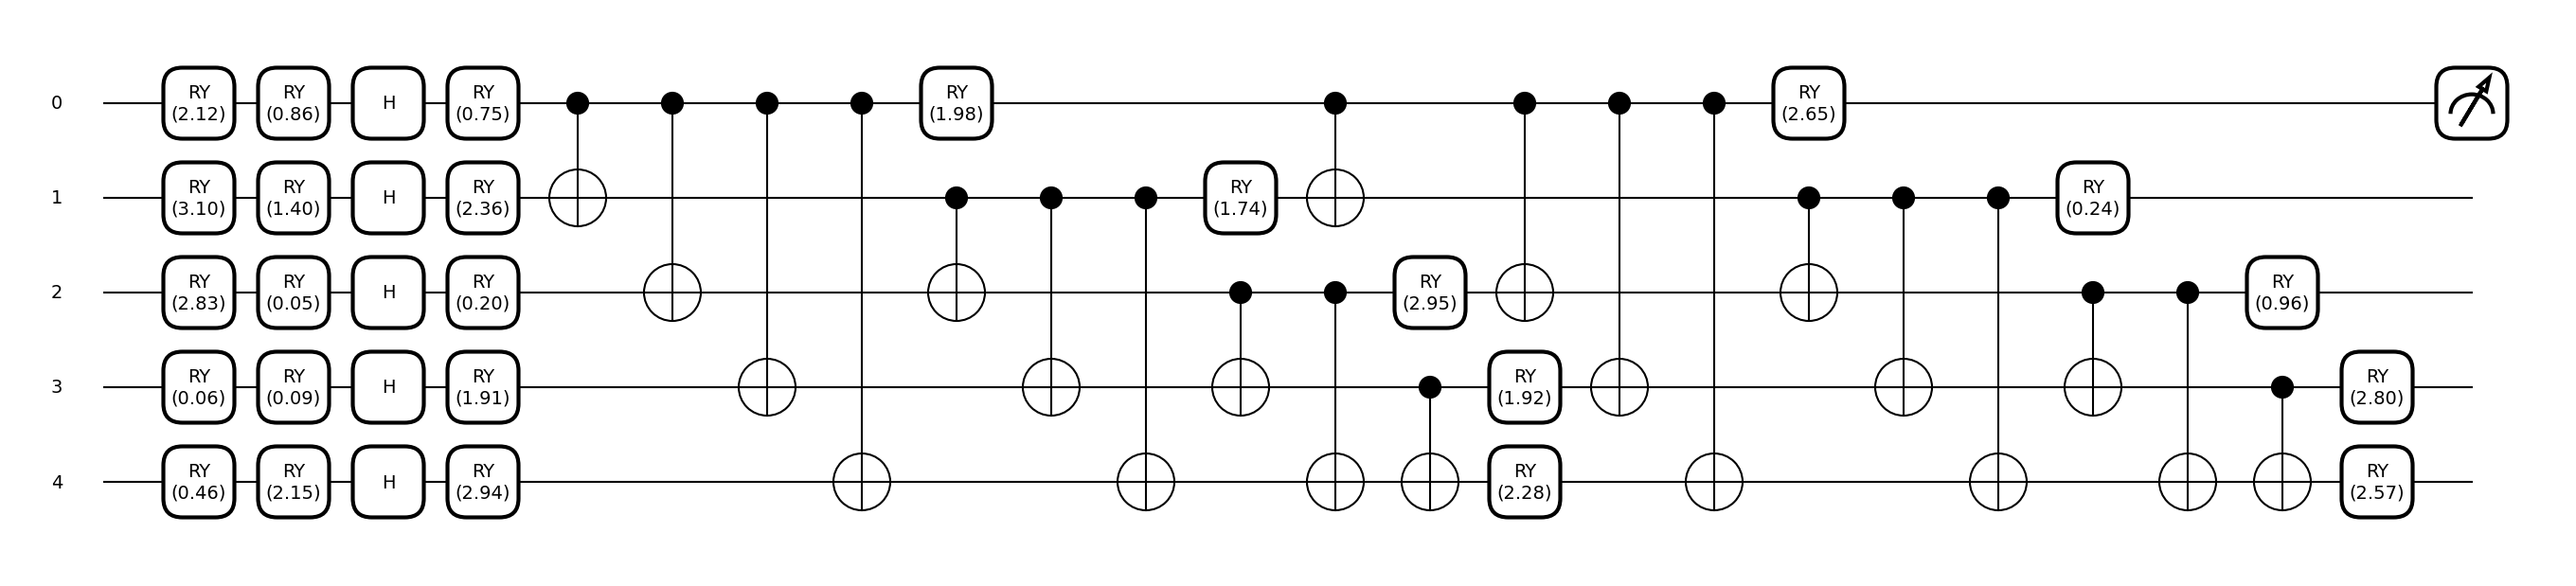

In [26]:
import pennylane as qml
from pennylane import numpy as np

# Define number of qubits
num_qubits = 5

# Define the quantum device with 5 qubits
dev = qml.device('lightning.qubit', wires=num_qubits)

# Define the quantum circuit for encoding and variational layers
@qml.qnode(dev)
def circuit(features, weights):
    # Step 1: Encoding original and second-order features into qubits using RY gates
    for i in range(num_qubits):
        qml.RY(features[i] * np.pi, wires=i)  # First set of features
        qml.RY(features[i + num_qubits] * np.pi, wires=i)  # Second-order features

    # Step 2: Apply Hadamard gates after encoding
    for i in range(num_qubits):
        qml.Hadamard(wires=i)
    
    # Step 3: Variational layers with trainable parameters (3 layers)
    for j in range(3):
        # Apply parameterized RY gates
        for k in range(num_qubits):
            qml.RY(weights[j][k], wires=k)
        if j!=2:

            # Step 4: Apply cascading CNOT entanglement (complex strategy)
            for i in range(num_qubits):
                for j in range(i + 1, num_qubits):
                    qml.CNOT(wires=[i, j])

    # Step 5: Return expectation value of the first qubit
    return qml.expval(qml.PauliZ(0))

# Example input for the features and weights
features = np.random.random(2 * num_qubits)  # 2 * num_qubits features for original and second-order terms
weights = np.random.random((3, num_qubits)) * np.pi  # Random weights for 3 layers of RY rotations

# Execute the circuit
output = circuit(features, weights)
print(f"Output of the circuit: {output}")

# Visualize the circuit
from matplotlib import pyplot as plt
fig, ax = qml.draw_mpl(circuit, decimals=2)(features, weights)
plt.show()


In [27]:
# Initialize random weights for 3 layers of 5 qubits
weights = np.random.uniform(0, 2 * np.pi, (2, num_qubits))


In [28]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [29]:
def cost_function(weights, X, y):
    total_loss = 0
    for features, label in zip(X, y):
        pred = circuit(features, weights)
        total_loss += (pred - label) ** 2
    return total_loss / len(X)


In [30]:
# Reduce the dataset size to a smaller subset, e.g., 1000 samples
subset_size = 2000

# Randomly select a subset of the training and test data
X_train = X_train[:subset_size]
y_train = np.array(y_train[:subset_size])  # Ensure y_train is a NumPy array

# If needed, reduce the size of the test data as well
X_test = X_test[:subset_size]
y_test = np.array(y_test[:subset_size])  # Ensure y_test is a NumPy array


In [31]:
batch_size = 32
num_steps = 100  # Number of optimization steps
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define a simple gradient descent optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.01)

# Initialize trainable parameters
weights = np.random.uniform(0, 2 * np.pi, (3, num_qubits))

# Total number of samples in the training set
total_samples = len(X_train)
y_train = np.array(y_train)  # Convert y_train to a NumPy array for consistent indexing

# Store the history for loss and accuracy
loss_history = []
accuracy_history = []

def accuracy(weights, X, y):
    predictions = [np.round(circuit(x, weights)) for x in X]
    return np.mean(np.array(predictions) == y)

In [32]:

for step in range(num_steps):
    indices = np.random.permutation(total_samples)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Track loss and accuracy for each step
    step_loss = 0
    step_accuracy = 0
    for batch_start in range(0, total_samples, batch_size):
        batch_end = min(batch_start + batch_size, total_samples)
        X_batch = X_train_shuffled[batch_start:batch_end]
        y_batch = y_train_shuffled[batch_start:batch_end]

        # Optimize the weights for the current mini-batch
        weights = opt.step(lambda w: cost_function(w, X_batch, y_batch), weights)

        # Calculate batch loss and accuracy
        batch_loss = cost_function(weights, X_batch, y_batch)
        batch_accuracy = accuracy(weights, X_batch, y_batch)

        # Add batch results to step totals
        step_loss += batch_loss
        step_accuracy += batch_accuracy * len(X_batch)

        # Print the batch summary
        print(f"Step {step + 1}/{num_steps}, Batch: {batch_start//batch_size + 1}, Loss: {batch_loss:.4f}, Accuracy: {batch_accuracy:.4f}")

    # Average loss and accuracy over all mini-batches
    step_loss /= (total_samples / batch_size)
    step_accuracy /= total_samples

    # Store the values in history
    loss_history.append(step_loss)
    accuracy_history.append(step_accuracy)

    # Print the step summary
    print(f"\n--- Step {step + 1}/{num_steps} ---")
    print(f"Step Loss: {step_loss:.4f}, Step Accuracy: {step_accuracy:.4f}\n")

Step 1/100, Batch: 1, Loss: 0.8531, Accuracy: 0.1875
Step 1/100, Batch: 2, Loss: 0.7079, Accuracy: 0.3750
Step 1/100, Batch: 3, Loss: 0.4366, Accuracy: 0.5938
Step 1/100, Batch: 4, Loss: 0.5509, Accuracy: 0.3750
Step 1/100, Batch: 5, Loss: 0.5107, Accuracy: 0.3750
Step 1/100, Batch: 6, Loss: 0.5542, Accuracy: 0.4375
Step 1/100, Batch: 7, Loss: 0.5381, Accuracy: 0.4062
Step 1/100, Batch: 8, Loss: 0.6779, Accuracy: 0.3750
Step 1/100, Batch: 9, Loss: 0.3652, Accuracy: 0.6250
Step 1/100, Batch: 10, Loss: 0.5258, Accuracy: 0.3750
Step 1/100, Batch: 11, Loss: 0.4234, Accuracy: 0.5000
Step 1/100, Batch: 12, Loss: 0.5314, Accuracy: 0.3438
Step 1/100, Batch: 13, Loss: 0.5124, Accuracy: 0.4062
Step 1/100, Batch: 14, Loss: 0.4069, Accuracy: 0.5938
Step 1/100, Batch: 15, Loss: 0.5223, Accuracy: 0.4375
Step 1/100, Batch: 16, Loss: 0.4706, Accuracy: 0.5938
Step 1/100, Batch: 17, Loss: 0.6166, Accuracy: 0.3750
Step 1/100, Batch: 18, Loss: 0.3602, Accuracy: 0.5312
Step 1/100, Batch: 19, Loss: 0.4407, 

KeyboardInterrupt: 

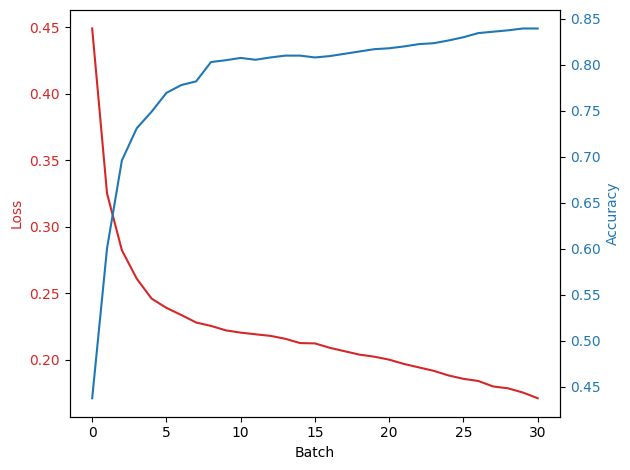

In [33]:
# Plot the training loss and accuracy over batches
fig, ax1 = plt.subplots()

# Plot loss
color = 'tab:red'
ax1.set_xlabel('Batch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(loss_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(accuracy_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
fig.tight_layout()
plt.show()

In [168]:
# Initialize random weights for 3 layers of 5 qubits
weights = np.random.uniform(0, 2 * np.pi, (3, num_qubits))


In [169]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [170]:
def cost_function(weights, X, y):
    total_loss = 0
    for features, label in zip(X, y):
        pred = circuit(features, weights)
        total_loss += (pred - label) ** 2
    return total_loss / len(X)


In [171]:
# Reduce the dataset size to a smaller subset, e.g., 1000 samples
subset_size = 2000

# Randomly select a subset of the training and test data
X_train = X_train[:subset_size]
y_train = np.array(y_train[:subset_size])  # Ensure y_train is a NumPy array

# If needed, reduce the size of the test data as well
X_test = X_test[:subset_size]
y_test = np.array(y_test[:subset_size])  # Ensure y_test is a NumPy array


In [172]:
batch_size = 32
num_steps = 50  # Number of optimization steps
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Define a simple gradient descent optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# Initialize trainable parameters
weights = np.random.uniform(0, 2 * np.pi, (3, num_qubits))

# Total number of samples in the training set
total_samples = len(X_train)
y_train = np.array(y_train)  # Convert y_train to a NumPy array for consistent indexing

# Store the history for loss and accuracy
loss_history = []
accuracy_history = []

def accuracy(weights, X, y):
    predictions = [np.round(circuit(x, weights)) for x in X]
    return np.mean(np.array(predictions) == y)

In [173]:

for step in range(num_steps):
    indices = np.random.permutation(total_samples)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Track loss and accuracy for each step
    step_loss = 0
    step_accuracy = 0
    for batch_start in range(0, total_samples, batch_size):
        batch_end = min(batch_start + batch_size, total_samples)
        X_batch = X_train_shuffled[batch_start:batch_end]
        y_batch = y_train_shuffled[batch_start:batch_end]

        # Optimize the weights for the current mini-batch
        weights = opt.step(lambda w: cost_function(w, X_batch, y_batch), weights)

        # Calculate batch loss and accuracy
        batch_loss = cost_function(weights, X_batch, y_batch)
        batch_accuracy = accuracy(weights, X_batch, y_batch)

        # Add batch results to step totals
        step_loss += batch_loss
        step_accuracy += batch_accuracy * len(X_batch)

        # Print the batch summary
        print(f"Step {step + 1}/{num_steps}, Batch: {batch_start//batch_size + 1}, Loss: {batch_loss:.4f}, Accuracy: {batch_accuracy:.4f}")

    # Average loss and accuracy over all mini-batches
    step_loss /= (total_samples / batch_size)
    step_accuracy /= total_samples

    # Store the values in history
    loss_history.append(step_loss)
    accuracy_history.append(step_accuracy)

    # Print the step summary
    print(f"\n--- Step {step + 1}/{num_steps} ---")
    print(f"Step Loss: {step_loss:.4f}, Step Accuracy: {step_accuracy:.4f}\n")

Step 1/50, Batch: 1, Loss: 0.5332, Accuracy: 0.4062
Step 1/50, Batch: 2, Loss: 0.3350, Accuracy: 0.4375
Step 1/50, Batch: 3, Loss: 0.4934, Accuracy: 0.1250
Step 1/50, Batch: 4, Loss: 0.5906, Accuracy: 0.1562
Step 1/50, Batch: 5, Loss: 0.4697, Accuracy: 0.2188
Step 1/50, Batch: 6, Loss: 0.3349, Accuracy: 0.3438
Step 1/50, Batch: 7, Loss: 0.5169, Accuracy: 0.1875
Step 1/50, Batch: 8, Loss: 0.5746, Accuracy: 0.2500
Step 1/50, Batch: 9, Loss: 0.4996, Accuracy: 0.1875
Step 1/50, Batch: 10, Loss: 0.4343, Accuracy: 0.2500
Step 1/50, Batch: 11, Loss: 0.4265, Accuracy: 0.2500
Step 1/50, Batch: 12, Loss: 0.3311, Accuracy: 0.3125
Step 1/50, Batch: 13, Loss: 0.4769, Accuracy: 0.2500
Step 1/50, Batch: 14, Loss: 0.3267, Accuracy: 0.3125
Step 1/50, Batch: 15, Loss: 0.5687, Accuracy: 0.2188
Step 1/50, Batch: 16, Loss: 0.2775, Accuracy: 0.2500
Step 1/50, Batch: 17, Loss: 0.5462, Accuracy: 0.2812
Step 1/50, Batch: 18, Loss: 0.3822, Accuracy: 0.1875
Step 1/50, Batch: 19, Loss: 0.2865, Accuracy: 0.3438
St

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7175f838ea40>>
Traceback (most recent call last):
  File "/home/ap1284@DS.UAH.edu/Atit/.venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


Step 9/50, Batch: 7, Loss: 0.3331, Accuracy: 0.5312
Step 9/50, Batch: 8, Loss: 0.2939, Accuracy: 0.6562
Step 9/50, Batch: 9, Loss: 0.2406, Accuracy: 0.4375
Step 9/50, Batch: 10, Loss: 0.3852, Accuracy: 0.7500
Step 9/50, Batch: 11, Loss: 0.3023, Accuracy: 0.6250
Step 9/50, Batch: 12, Loss: 0.3487, Accuracy: 0.7188
Step 9/50, Batch: 13, Loss: 0.3810, Accuracy: 0.4688
Step 9/50, Batch: 14, Loss: 0.2523, Accuracy: 0.8125
Step 9/50, Batch: 15, Loss: 0.3299, Accuracy: 0.7812
Step 9/50, Batch: 16, Loss: 0.3035, Accuracy: 0.6562
Step 9/50, Batch: 17, Loss: 0.3858, Accuracy: 0.5938
Step 9/50, Batch: 18, Loss: 0.3229, Accuracy: 0.6562
Step 9/50, Batch: 19, Loss: 0.1731, Accuracy: 0.7188
Step 9/50, Batch: 20, Loss: 0.2487, Accuracy: 0.8750
Step 9/50, Batch: 21, Loss: 0.2940, Accuracy: 0.7188
Step 9/50, Batch: 22, Loss: 0.2702, Accuracy: 0.5625
Step 9/50, Batch: 23, Loss: 0.2810, Accuracy: 0.8125
Step 9/50, Batch: 24, Loss: 0.2937, Accuracy: 0.6562
Step 9/50, Batch: 25, Loss: 0.3420, Accuracy: 0.6

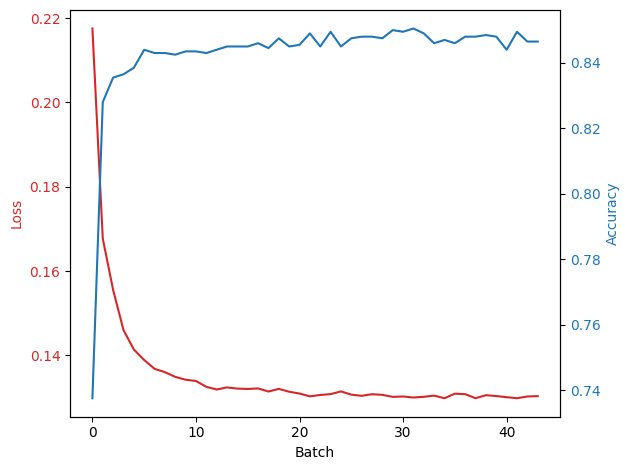

In [166]:
# Plot the training loss and accuracy over batches
fig, ax1 = plt.subplots()

# Plot loss
color = 'tab:red'
ax1.set_xlabel('Batch')
ax1.set_ylabel('Loss', color=color)
ax1.plot(loss_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot accuracy
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(accuracy_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
fig.tight_layout()
plt.show()